Ted Li 1/27/2025

This is a python notebook used to solve Mathematical Contest in Modeling (MCM) 2025 Problem C

First we need to analyze our data through a structured approach. We will explore the trends throughout the data. This will help us get to understand the underlying patterns within the dataset and whether we can make/not make certain assumptions therefore determining the model that we're allowed to use.

In [18]:
import pandas as pd

# Load the datasets
medal_counts = pd.read_csv('2025_Problem_C_Data/summerOly_medal_counts.csv')
hosts = pd.read_csv('2025_Problem_C_Data/summerOly_hosts.csv')
programs = pd.read_csv('2025_Problem_C_Data/summerOly_programs.csv', encoding='latin1')
athletes = pd.read_csv('2025_Problem_C_Data/summerOly_athletes.csv')

# Preview the data
print(medal_counts.head())
print(hosts.head())
print(programs.head())
print(athletes.head())


   Rank            NOC  Gold  Silver  Bronze  Total  Year
0     1  United States    11       7       2     20  1896
1     2         Greece    10      18      19     47  1896
2     3        Germany     6       5       2     13  1896
3     4         France     5       4       2     11  1896
4     5  Great Britain     2       3       2      7  1896
   Year                       Host
0  1896             Athens, Greece
1  1900              Paris, France
2  1904   St. Louis, United States
3  1908     London, United Kingdom
4  1912          Stockholm, Sweden
      Sport         Discipline Code Sports Governing Body 1896 1900 1904  \
0  Aquatics  Artistic Swimming  SWA        World Aquatics    0    0    0   
1  Aquatics             Diving  DIV        World Aquatics    0    0    2   
2  Aquatics  Marathon Swimming  OWS        World Aquatics    0    0    0   
3  Aquatics           Swimming  SWM        World Aquatics    4    7    9   
4  Aquatics         Water Polo  WPO        World Aquatics    0

In [19]:
#Breakup the sports into individual vs team
unique_values = athletes['Sport'].unique()

print(unique_values)
print(len(unique_values))

['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics' 'Cycling Road'
 'Artistic Gymnastics' 'Karate' 'Baseball/Softball'
 'Trampoline Gymnastics' 'Marathon Swimming' 'Canoe Slalom' 'Surfing'
 'Canoe Sprint' 'Cycling BMX Racing' 'Equestrian' 'Artistic Swimming'
 'Cycling Track' 'Skateboarding' 'Cycling Mountain Bike' '3x3 Basketball'
 'Cycling BMX Freestyle' 'Sport Climbing' 'Marathon Swimming,

The first questions we should begin asking is:

Are there missing values or inconsistencies in the data?

How are the variables distributed?

What is the range of years covered in each dataset?

In [20]:
#Check for missing values
datasets = {
    'medal_counts': medal_counts,
    'hosts': hosts,
    'programs': programs,
    'athletes': athletes
}

# Check for missing entries in each dataset
for name, df in datasets.items():
    print(f"Checking missing entries in {name}:")
    missing_values = df.isnull()
    print("Missing entries in each column:\n", missing_values.sum())
    
    if missing_values.any().any():
        print(f"There are missing entries in {name}.")
    else:
        print(f"No missing entries found in {name}.")
    print()  # Add a newline for better readability

Checking missing entries in medal_counts:
Missing entries in each column:
 Rank      0
NOC       0
Gold      0
Silver    0
Bronze    0
Total     0
Year      0
dtype: int64
No missing entries found in medal_counts.

Checking missing entries in hosts:
Missing entries in each column:
 Year    0
Host    0
dtype: int64
No missing entries found in hosts.

Checking missing entries in programs:
Missing entries in each column:
 Sport                    0
Discipline               2
Code                     0
Sports Governing Body    0
1896                     0
1900                     0
1904                     0
1906*                    0
1908                     0
1912                     0
1920                     0
1924                     0
1928                     2
1932                     2
1936                     2
1948                     2
1952                     2
1956                     2
1960                     2
1964                     2
1968                     2
1972      

In [21]:
# If a country wins a medal, 
# how will this impact the chances of winning other medals?

import numpy as np

# Select the columns representing Gold, Silver, and Bronze medals
gold = medal_counts['Gold']
silver = medal_counts['Silver']
bronze = medal_counts['Bronze']

# Calculate the correlation matrix using Pearson's Correlation Coefficient
correlation_matrix = np.corrcoef([gold, silver, bronze])

corr_df = pd.DataFrame(correlation_matrix, columns=['Gold', 'Silver', 'Bronze'], index=['Gold', 'Silver', 'Bronze'])

print("Correlation Matrix:")
print(corr_df)


Correlation Matrix:
            Gold    Silver    Bronze
Gold    1.000000  0.921144  0.881062
Silver  0.921144  1.000000  0.906400
Bronze  0.881062  0.906400  1.000000


Interpreting the correlation matrix, we can see that all 3 medal types are positively correlated. For example if a country wins a Gold medal it is roughly 92% of also winning a silver medal. 
If we wanted to we can further aggregate this into seeing the correlation among distinct countries. For example if Denmark wins gold what is the probability of also winning silver or bronze. However, due to the number of countries participating, this averaged correlation matrix will give us the info we need.

This was done using the pearson coefficient.

Data Manipulation using SQL: We will begin organizing our data. First we will add a column to note if the country was where the Olympics were hosted that year.

In [22]:
import sqlite3

# Convert your datasets to DataFrames
df_medal = pd.DataFrame(medal_counts)  
df_hosts = pd.DataFrame(hosts) 

# Initialize a database file and connect with sqlite3
db_file = "olympic_data.db"
conn = sqlite3.connect(db_file)

# Write our dataframes to database
df_medal.to_sql(name='medal_counts', con=conn, if_exists='replace', index=False)
df_hosts.to_sql(name='hosts', con=conn, if_exists='replace', index=False)

cursor = conn.cursor()

# Add a column to indicate if the country was the host
try:
    add_column_query = "ALTER TABLE medal_counts ADD COLUMN Is_Host_Country INTEGER DEFAULT 0;"
    cursor.execute(add_column_query)
    conn.commit()
except sqlite3.OperationalError:
    # Ignore if the column already exists
    print("Column 'Is_Host_Country' already exists.")

#Query to update the Is_Host_Country column
update_query = """
UPDATE medal_counts
SET Is_Host_Country = 1
WHERE EXISTS (
    SELECT 1
    FROM hosts
    WHERE hosts.Year = medal_counts.Year
    AND TRIM(SUBSTR(hosts.Host, INSTR(hosts.Host, ',') + 2)) = medal_counts.NOC
);
"""

cursor.execute(update_query)
conn.commit()

# Close the connection
cursor.close()
conn.close()


Let's confirm our query worked by printing out the countries that hosted the olympics over the course of 1896 - 2024.

In [23]:
# Connect to the database
db_file = "olympic_data.db"
conn = sqlite3.connect(db_file)

# Query to check the updated Is_Host_Country column
query = """
SELECT Year, NOC, Total, Is_Host_Country
FROM medal_counts
WHERE Is_Host_Country = 1
ORDER BY Year, NOC;
"""

# Load the results into a Pandas DataFrame
df_check = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the results
print(df_check)


    Year            NOC  Total  Is_Host_Country
0   1896         Greece     47                1
1   1900         France    103                1
2   1904  United States    231                1
3   1912         Sweden     65                1
4   1920        Belgium     36                1
5   1924         France     38                1
6   1928    Netherlands     19                1
7   1936        Germany    101                1
8   1952        Finland     22                1
9   1956      Australia     35                1
10  1964          Japan     29                1
11  1968         Mexico      9                1
12  1972   West Germany     40                1
13  1976         Canada     11                1
14  1980   Soviet Union    195                1
15  1984  United States    174                1
16  1988    South Korea     33                1
17  1992          Spain     22                1
18  1996  United States    101                1
19  2000      Australia     58          

Now that we've created this new column of Is_Host_Country let's see if it has a correlation in the number of medals a country wins

In [24]:
conn = sqlite3.connect(db_file)

# Query to get the updated data from the database
query = """
SELECT *
FROM medal_counts
"""

# Load the results into a Pandas DataFrame
medal_counts = pd.read_sql_query(query, conn)
conn.close()
print(medal_counts.head())


   Rank            NOC  Gold  Silver  Bronze  Total  Year  Is_Host_Country
0     1  United States    11       7       2     20  1896                0
1     2         Greece    10      18      19     47  1896                1
2     3        Germany     6       5       2     13  1896                0
3     4         France     5       4       2     11  1896                0
4     5  Great Britain     2       3       2      7  1896                0


In [25]:
correlation = medal_counts['Total'].corr(medal_counts['Is_Host_Country'])
print(f"Correlation between being a host country and total medals: {correlation}")

Correlation between being a host country and total medals: 0.31962361177340465


While not drastic, we can see a positive correlation between a host country and the number of medals they win that year. 
Modeling considerations: The weak correlation means Is_Host_Country has a small impact on the medals won.

Next, we will combine the athletes and medal_counts tables. We will join these tables on both the Year and Team columns, where the Team represents the country the athlete competed for and matches the country in the medal_counts table, and the Year corresponds to the Olympic Games year in which the athlete participated, which is also the same year in which the country’s medal count is recorded.

In [26]:
df_athletes = pd.DataFrame(athletes)

conn = sqlite3.connect(db_file)

df_athletes.to_sql(name='athletes', con=conn, if_exists='replace', index=False)


join_query = """
SELECT * FROM athletes
JOIN medal_counts ON athletes.Year = medal_counts.Year 
AND athletes.Team = medal_counts.NOC
"""

# Execute the query and load the result into a pandas DataFrame
df_joined = pd.read_sql_query(join_query, conn)

# Close the connection
conn.close()


rows_with_usa = df_joined[df_joined.iloc[:, 3] == "USA"]

print(df_joined.head())
print("Column names:", df_joined.columns.tolist())


          Name Sex     Team  NOC  Year       City       Sport  \
0    A Dijiang   M    China  CHN  1992  Barcelona  Basketball   
1     A Lamusi   M    China  CHN  2012     London        Judo   
2  Gunnar Aaby   M  Denmark  DEN  1920  Antwerpen    Football   
3  Einar Aalto   M  Finland  FIN  1952   Helsinki    Swimming   
4   Jyri Aalto   M  Finland  FIN  2000     Sydney   Badminton   

                                 Event     Medal  Rank      NOC  Gold  Silver  \
0          Basketball Men's Basketball  No medal     4    China    16      22   
1         Judo Men's Extra-Lightweight  No medal     2    China    39      31   
2              Football Men's Football  No medal    10  Denmark     3       9   
3  Swimming Men's 400 metres Freestyle  No medal     8  Finland     6       3   
4              Badminton Men's Singles  No medal    31  Finland     2       1   

   Bronze  Total  Year  Is_Host_Country  
0      16     54  1992                0  
1      22     92  2012                

Next we need to encode the columns containing strings

In [27]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(column):
    le = LabelEncoder().fit(column)
    return le



In [28]:
cols = ["Name", "Sex", "Team", "City", "Sport", "Event"]
col_idx = [0, 1, 3, 4, 5, 7]
encoders = {}

# Encode all columns and store their encoders
for col in cols: 
    encoder = label_encoder(df_joined[col])
    df_joined[col] = encoder.transform(df_joined[col])  # Transform the column
    encoders[col] = encoder  
#team_encoded_value = encoded_columns['Team'][df_joined['Team'] == 'United States'][0]

year_col = df_joined['Year'].iloc[:,[0]]
df_joined = df_joined.drop(['Year', 'NOC'], axis=1  )
df_joined["Year"] = year_col


In [29]:
print(df_joined.head())

    Name  Sex  Team  City  Sport  Event     Medal  Rank  Gold  Silver  Bronze  \
0      4    1    25     4     12    156  No medal     4    16      22      16   
1      5    1    25     8     42    341  No medal     2    39      31      22   
2  35269    1    34     1     35    303  No medal    10     3       9       1   
3  24527    1    45     7     61    704  No medal     8     6       3      13   
4  52108    1    45    20      9    150  No medal    31     2       1       1   

   Total  Is_Host_Country  Year  
0     54                0  1992  
1     92                0  2012  
2     13                0  1920  
3     22                1  1952  
4      4                0  2000  


In [30]:
# Step 1: Check if a contestant earned a medal
# Create a binary column indicating whether a medal was earned (1 for medal, 0 for "No medal")
df_joined['Medal_Earned'] = df_joined['Medal'].apply(lambda x: 1 if x != "No medal" else 0)

# Step 2: Group by Year, Team, and Event, and calculate the total medals for each group
event_medals = df_joined.groupby(['Year', 'Team', 'Event'])['Medal_Earned'].sum().reset_index()
event_medals_sorted = event_medals.sort_values(by='Medal_Earned', ascending=False).reset_index(drop=True)

# Display the updated dataframe
print(event_medals_sorted)

       Year  Team  Event  Medal_Earned
0      2024    46    364            67
1      2020   141    805            65
2      2024   141    793            62
3      2020    46    805            41
4      2020    46    376            40
...     ...   ...    ...           ...
88189  1896     7    682             0
88190  1896     7    285             0
88191  1896     7    211             0
88192  1896     6    753             0
88193  1896     6    111             0

[88194 rows x 4 columns]


In [31]:
#First we'll make all medals be weighted the same. 
#We'll later change this to rank medals with varried weights
df_joined["Medal"] = df_joined["Medal"].map({
    "No medal": 0,
    "Gold": 1,
    "Bronze": 1,
    "Silver": 1
})



print(df_joined.head())

    Name  Sex  Team  City  Sport  Event  Medal  Rank  Gold  Silver  Bronze  \
0      4    1    25     4     12    156      0     4    16      22      16   
1      5    1    25     8     42    341      0     2    39      31      22   
2  35269    1    34     1     35    303      0    10     3       9       1   
3  24527    1    45     7     61    704      0     8     6       3      13   
4  52108    1    45    20      9    150      0    31     2       1       1   

   Total  Is_Host_Country  Year  Medal_Earned  
0     54                0  1992             0  
1     92                0  2012             0  
2     13                0  1920             0  
3     22                1  1952             0  
4      4                0  2000             0  


Now our data has been cleaned and preprocessed, we can use it in a model to make predictions. We'll go through several models from tree based to multivariate models in order to gauge the which one gives the best performance.

In [32]:
X = df_joined.drop(['Name','Medal', 'Rank', 'Gold', 'Silver', 'Bronze', 'Total', 'Medal_Earned'], axis=1)
y = df_joined['Total']

In [33]:
print(X.head())

   Sex  Team  City  Sport  Event  Is_Host_Country  Year
0    1    25     4     12    156                0  1992
1    1    25     8     42    341                0  2012
2    1    34     1     35    303                0  1920
3    1    45     7     61    704                1  1952
4    1    45    20      9    150                0  2000


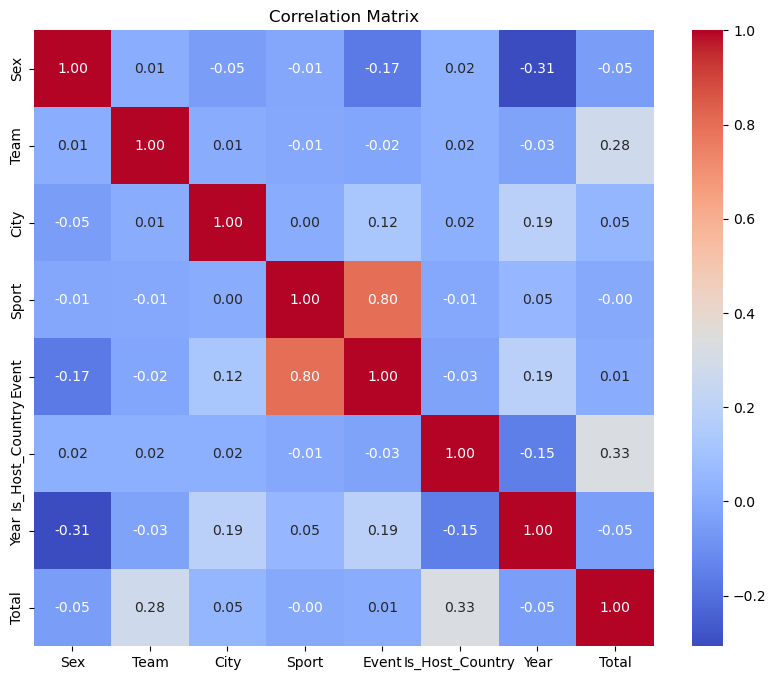

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_df = X
corr_df['Total'] = y
correlation_matrix = corr_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

The correlation between Is_Host_Country and Team are the highest with our target "Total" but are still rather weak in terms of a linear relationship. Thus we will attempt with Random Forest model due to their handling of non-linear data

In [35]:
# Group by 'Team', 'Event', and 'Year' and count the number of medals (Gold, Silver, Bronze)
df_aggregated = df_joined.groupby(['Team', 'Event', 'Sport', 'Year', 'Sex', 'Is_Host_Country']).agg(
    Gold=('Medal', lambda x: (x == 'Gold').sum()),
    Silver=('Medal', lambda x: (x == 'Silver').sum()),
    Bronze=('Medal', lambda x: (x == 'Bronze').sum())
).reset_index()

# Now, aggregate by 'Team', 'Event', and 'Year' to get the total number of medals for each year
df_aggregated['Total'] = df_aggregated['Gold'] + df_aggregated['Silver'] + df_aggregated['Bronze']

# Add event-specific features (you may calculate the number of participants if needed)
df_aggregated['Event_Participants'] = df_aggregated.groupby('Event')['Event'].transform('count')

# For each year, calculate the 'Total' for that year
df_aggregated['Total_2024'] = df_aggregated.groupby('Team')['Total'].transform('sum')

# Now the dataframe has the correct medal count for each country, event, and year
print(df_aggregated.head())

   Team  Event  Sport  Year  Sex  Is_Host_Country  Gold  Silver  Bronze  \
0     0     74      8  2008    1                0     0       0       0   
1     0     74      8  2012    1                0     0       0       0   
2     0    123      8  2008    0                0     0       0       0   
3     0    123      8  2012    0                0     0       0       0   
4     0    163     15  2012    1                0     0       0       0   

   Total  Event_Participants  Total_2024  
0      0                 547           0  
1      0                 547           0  
2      0                 388           0  
3      0                 388           0  
4      0                 415           0  


In [36]:
df_aggregated = df_aggregated.drop(['Gold', 'Silver', 'Bronze', 'Total_2024'], axis=1)


In [37]:

# X= df_aggregated.drop(["Total"], axis=1)
# y = df_aggregated["Total"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# sc = MinMaxScaler()
# X_train_scaled = sc.fit_transform(X_train)
# X_test_scaled = sc.transform(X_test)

# rf = RandomForestRegressor()
# rf.fit(X_train_scaled, y_train)


NameError: name 'train_test_split' is not defined

We reach a important crossroad on choosing our data split. Should it be time-based split or random split? 

As we have seen the number of medals given each year has been increasing thus the changing distribution of the countries rank as there are more medals to be given due to a larger sample size.

However, if we were to use a random split then the model might pickup on trends throughout the timeline that wouldn't be accessible when we implement this model. For example trying to predict 2040 olympic's outcome, we won't have access to the previous years.

Thus since both have advantages and disadvantages we will implement both

In [38]:
from sklearn.model_selection import train_test_split

X = df_joined.drop(['Name', 'Medal', 'Rank', 'Gold', 'Silver', 'Bronze', 'Total', 'Medal_Earned'], axis=1)
y = df_joined['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [40]:
print(X_train)

        Sex  Team  City  Sport  Event  Is_Host_Country  Year
74454     1    23    16      8     75                0  2016
6520      0    18     2     72    790                0  2004
15320     1    49     2     37    318                0  1896
44411     0    65     3     62    735                0  1996
24886     0    27    20     61    721                0  2000
...     ...   ...   ...    ...    ...              ...   ...
75354     0    89     5     21    246                0  2008
128289    1   107    20     61    708                0  2000
176779    1   144     9      8     97                0  1984
158187    1    58     7     73    969                0  1952
204231    0   100    15     61    824                0  2024

[145898 rows x 7 columns]


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [42]:
y_pred = rf.predict(X_test_scaled)


In [43]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.939067297850563

Instead of using a classifier, we'll try using a regressor to predict the number of medals a country will win. We'll round the final value to have a whole number in order to check the accuracy with our testing data

In [44]:
# We'll now try to use a RandomForest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_estimators=100)

rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [45]:
y_pred = rf.predict(X_test_scaled)
rf.score(X_test_scaled, y_pred)


1.0

In [46]:
y_pred_rounded = np.round(y_pred)
accuracy_score(y_test, y_pred_rounded)

0.9991363868986693

In [47]:
print(X_test.head())

        Sex  Team  City  Sport  Event  Is_Host_Country  Year
135925    1   141    12     38    334                0  1976
126574    0    17     8      8    126                0  1948
138241    1   141     7     32    266                0  1952
50476     1    82     6     56    654                0  1936
1846      1   135     7     35    303                0  1952


In [48]:
X_test["Predictions"] = y_pred_rounded
print(X_test.head())

        Sex  Team  City  Sport  Event  Is_Host_Country  Year  Predictions
135925    1   141    12     38    334                0  1976         94.0
126574    0    17     8      8    126                0  1948          1.0
138241    1   141     7     32    266                0  1952         76.0
50476     1    82     6     56    654                0  1936          3.0
1846      1   135     7     35    303                0  1952          3.0


In [49]:
# Create a DataFrame for predicted_2028
testing_df = pd.DataFrame(X_test, columns=['Team', 'Predictions'])

testing_df_sorted = testing_df.sort_values(by='Predictions', ascending=False)

# Group by 'Team' and sum the 'Predictions'
leaderboard = testing_df_sorted.drop_duplicates(subset='Team', keep='first').reset_index(drop=True)

leaderboard['Team'] = encoders['Team'].inverse_transform(leaderboard['Team'])

# Display the leaderboard for the testing data (Keep in mind this is random throughout the years)
print(leaderboard)

                Team  Predictions
0      United States        231.0
1       Soviet Union        195.0
2      Great Britain        146.0
3       East Germany        126.0
4       Unified Team        112.0
..               ...          ...
142  North Macedonia          1.0
143            Tonga          1.0
144         Paraguay          1.0
145     Burkina Faso          1.0
146       Cabo Verde          1.0

[147 rows x 2 columns]


99.9% accuracy. Seems too good to be true.

For now we'll use this model to make our predictions for USA Olympics in 2028

To find predictions we will need to make assumptions of the 2028 Olympics. The number of contestants per country has not been officially announced and each country will get a different number of athletes in the games. Some countries have many athletes who qualified for the olympics while less populated countries would likely have less athletes. This gives a large advantage to those with more contestants as there are more opportunities for them to win medals for their nation, boosting their country's rank.

The number of countries has also not been officially confirmed.

Additionally there were 32 sports in 2024 olympics but will have 35 sports in 2028 as there are predicted 5 new sports coming to LA28 such as Baseball/Softball, Lacrosse, Cricket, Flag football, squash. Flag football and squash being completely new to the Olympics with the other sports being returning events.


Given these new sports we need to figure out the event counts we need to consider based on previous events or Olympics.

We can also estimate the new number of contestants based on historical prediction in similar sports. 





We are able to get a accuracy score of 93.75%, which is incredibly high using a random forest and a random split. Let's now attempt at using a time-based split. Instead of using a strict year as cuttoff separating the train-test split we'll try it with sorting the dataframe by year increasing and selecting the first 70% of rows for training and leave the bottom 30% of rows for testing.

In [50]:
recent_years = [2016, 2020, 2024]

df_recent = X[X['Year'].isin(recent_years)]

# Group by Year and Sport, then count the number of contestants (rows)
grouped = df_recent.groupby(['Year', 'Sport']).size().reset_index(name='Contestant_Count')

# Calculate the average number of contestants per sport for each year
average_per_sport = grouped.groupby('Year')['Contestant_Count'].mean().reset_index(name='Average_Contestants_Per_Sport')

# Display the results
print(average_per_sport)

   Year  Average_Contestants_Per_Sport
0  2016                     362.441176
1  2020                     293.086957
2  2024                     259.880000


In [51]:
unique_events = df_recent[['Year', 'Sport', 'Event']].drop_duplicates()
events_per_sport = unique_events.groupby(['Year', 'Sport']).size().reset_index(name='Event_Count')
average_events_per_sport = events_per_sport.groupby('Year')['Event_Count'].mean().reset_index(name='Average_Events_Per_Sport')

print(average_events_per_sport)


   Year  Average_Events_Per_Sport
0  2016                      9.00
1  2020                      7.50
2  2024                      7.18


In [52]:
growth_rate_2016_2020 = (average_per_sport.loc[average_per_sport["Year"] == 2020, "Average_Contestants_Per_Sport"].values[0] - 
                         average_per_sport.loc[average_per_sport["Year"] == 2016, "Average_Contestants_Per_Sport"].values[0]) / 4

growth_rate_2020_2024 = (average_per_sport.loc[average_per_sport["Year"] == 2024, "Average_Contestants_Per_Sport"].values[0] - 
                         average_per_sport.loc[average_per_sport["Year"] == 2020, "Average_Contestants_Per_Sport"].values[0]) / 4

# Calculating the overall average growth rate
contestant_growth_rate = (growth_rate_2016_2020 + growth_rate_2020_2024) / 2

print(f"Contestant Growth Rate Per Game: {contestant_growth_rate}")

# Get the average events per sport for 2016, 2020, and 2024
avg_2016 = average_events_per_sport.loc[average_events_per_sport["Year"] == 2016, "Average_Events_Per_Sport"].values[0]
avg_2020 = average_events_per_sport.loc[average_events_per_sport["Year"] == 2020, "Average_Events_Per_Sport"].values[0]
avg_2024 = average_events_per_sport.loc[average_events_per_sport["Year"] == 2024, "Average_Events_Per_Sport"].values[0]

# Growth rate from 2016 to 2020
growth_rate_2016_2020 = (avg_2020 - avg_2016) / 4

# Growth rate from 2020 to 2024
growth_rate_2020_2024 = (avg_2024 - avg_2020) / 4

# Average growth rate per game
event_growth_rate = (growth_rate_2016_2020 + growth_rate_2020_2024) / 2

# Print the result
print("Average Growth Rate per Game (Events):", event_growth_rate)

Contestant Growth Rate Per Game: -12.82014705882353
Average Growth Rate per Game (Events): -0.22750000000000004


Now that we have calculated the average contestants per sport and average events per sport we can simulate the LA28 dataset for predictions

In [53]:
# Project 2028 averages
projected_avg_contestants_2028 = average_per_sport.loc[average_per_sport["Year"] == 2024, "Average_Contestants_Per_Sport"].values[0] + contestant_growth_rate
projected_avg_events_2028 = average_events_per_sport.loc[average_events_per_sport["Year"] == 2024, "Average_Events_Per_Sport"].values[0] + event_growth_rate

print(f"Projected Contestants for 2028: {projected_avg_contestants_2028}")
print(f"Projected Events for 2028: {projected_avg_events_2028}")

Projected Contestants for 2028: 247.05985294117647
Projected Events for 2028: 6.9525


In [54]:
print(X_train.head())

       Sex  Team  City  Sport  Event  Is_Host_Country  Year
74454    1    23    16      8     75                0  2016
6520     0    18     2     72    790                0  2004
15320    1    49     2     37    318                0  1896
44411    0    65     3     62    735                0  1996
24886    0    27    20     61    721                0  2000


In [55]:
# Load 2024 data as base
X_2024 = X[X['Year'] == 2024].copy()
team_counts = X_2024['Team'].value_counts(normalize=True)  # Normalize to get the proportion

new_sports = [74, 75, 76]  # Your new sports, as numeric identifiers or names
contestants_per_sport = 247  # Number of contestants per new sport
events_per_sport = 7  # Each sport will have 6 events

contestants_per_event = contestants_per_sport // events_per_sport
total_new_contestants = len(new_sports) * contestants_per_sport  # Total contestants in the new sports


#Create the team assignments
team_assignments = []
for team, proportion in team_counts.items():
    num_teams_for_new_sports = int(proportion * total_new_contestants)
    team_assignments.extend([team] * num_teams_for_new_sports)


if len(team_assignments) < total_new_contestants:
    team_assignments.extend(np.random.choice(list(team_counts.index), total_new_contestants - len(team_assignments)).tolist())

# Ensure the list length matches
team_assignments = team_assignments[:total_new_contestants]

# Step 2: Shuffle team assignments for random distribution
np.random.seed(42)
np.random.shuffle(team_assignments)

# Step 3: Generate the new rows for 2028
new_rows = []
event_start = 985  # Starting event number

index = 0  # Initialize index for team_assignments
for sport in new_sports:
    for event_num in range(events_per_sport):
        event_id = event_start + event_num  # Increment the event number for each sport
        for contestant_id in range(1, contestants_per_event + 1):
            
            sex = 1 if index % 2 == 0 else 0
            Is_Host = 1 if team_assignments[index] == 141 else 0
            new_rows.append({
                'Sex': sex, 
                'Team': team_assignments[index],  # Assign team from shuffled list
                'Sport': sport,
                'Event': event_id, 
                'Is_Host_Country': 0,
                'Year': 2028
            })
            index += 1
        # Increment event_start for next sport
        event_start = event_id + 1

# Step 4: Create a DataFrame from the new rows
new_df = pd.DataFrame(new_rows)

# Display the resulting 2028 dataset
#print(new_df.head())

proportion_counts = team_counts
proportion_counts.index = encoders['Team'].inverse_transform(proportion_counts.index)
print(proportion_counts)

United States    0.065723
France           0.061644
Australia        0.049946
Germany          0.049792
Italy            0.046945
                   ...   
Kosovo           0.000693
Cabo Verde       0.000539
Grenada          0.000462
Saint Lucia      0.000385
Dominica         0.000308
Name: proportion, Length: 82, dtype: float64


In [59]:
estimated_2028 = pd.concat([X_2024, new_df], ignore_index=True)

scaled_2028 = sc.transform(estimated_2028)

predicted_2028 = rf.predict(scaled_2028)
predicted_2028 = np.round(predicted_2028)


In [61]:
estimated_2028['Predictions'] = predicted_2028
print(estimated_2028.head())


   Sex  Team  City  Sport  Event  Is_Host_Country  Year  Predictions
0    1     4  15.0     73    469                0  2024          4.0
1    1     4  15.0     73    467                0  2024          4.0
2    1     4  15.0     73    466                0  2024          4.0
3    1     4  15.0     73    459                0  2024          4.0
4    1     4  15.0     73    460                0  2024          4.0


In [63]:
# Create a DataFrame for predicted_2028
predicted_2028_df = pd.DataFrame(estimated_2028, columns=['Team', 'Predictions'])

# Group by 'Team' and sum the 'Predictions'
predicted_df_sorted = predicted_2028_df.sort_values(by='Predictions', ascending=False)

# Sort the leaderboard by 'Predictions' in descending order
leaderboard_2028 = predicted_df_sorted.drop_duplicates(subset='Team', keep='first').reset_index(drop=True)

leaderboard_2028['Team'] = encoders['Team'].inverse_transform(leaderboard_2028['Team'])
# Display the leaderboard
print("2028 Olympic Medal Top 5 Countries")
print(leaderboard_2028.head())
print(leaderboard_2028["Predictions"].sum())


2028 Olympic Medal Top 5 Countries
            Team  Predictions
0  United States        126.0
1          China         91.0
2  Great Britain         65.0
3         France         64.0
4      Australia         53.0
975.0


Now that we have our predicted top 5 countries from 2028 let's take a look at the top 5 countries from the recorded 2024 Paris Olympics

In [66]:
# Filter the dataframe for Year = 2024
df_2024 = df_joined[df_joined['Year'] == 2024]

# Drop duplicates for each team to get unique Total values
leaderboard_2024 = df_2024[['Team', 'Total']].drop_duplicates()

# Sort by Total in descending order
leaderboard_2024 = leaderboard_2024.sort_values(by='Total', ascending=False)

# Add a ranking column
leaderboard_2024['Team'] = encoders['Team'].inverse_transform(leaderboard_2024['Team'])

leaderboard_2024['Rank'] = range(1, len(leaderboard_2024) + 1)

# Display the leaderboard
print(leaderboard_2024.head())
print(leaderboard_2024["Total"].sum())


                 Team  Total  Rank
200684  United States    126     1
198637          China     91     2
196064  Great Britain     65     3
195864         France     64     4
199588      Australia     53     5
966


The leaderboards are identical. Let's analyze if there are any difference between our predictions for 2028 and the medal totals for 2024

In [68]:
# Rename columns for clarity in each leaderboard
leaderboard_2024 = leaderboard_2024.rename(columns={'Total': 'Total_2024'})
leaderboard_2028 = leaderboard_2028.rename(columns={'Predictions': 'Total_2028'})

# Merge the two leaderboards on 'Team'
comparison = pd.merge(leaderboard_2024, leaderboard_2028, on='Team', how='outer')

# Fill NaN values with 0 (in case a team is missing from one of the years)
comparison.fillna(0, inplace=True)

# Calculate the difference in Total
comparison['Difference'] = comparison['Total_2028'] - comparison['Total_2024']

# Sort by the absolute value of the difference
comparison = comparison.sort_values(by='Difference', ascending=False, key=abs)


#comparison['Team'] = encoders['Team'].inverse_transform(comparison['Team'])
print(comparison.head())


           Team  Total_2024  Rank  Total_2028  Difference
17     Colombia           4    46         6.0         2.0
37    Indonesia           3    53         5.0         2.0
65  Saint Lucia           2    61         3.0         1.0
41      Jamaica           6    37         7.0         1.0
36        India           6    39         7.0         1.0


Indeed there are differences but it's miniscule. We only have two countries where the difference is +2. Our data for 2028 is likely wrong. Let's see if there's any country that would win their first medal in 2028.

In [119]:
# Filter for countries where 2024 total is 0 and 2028 total is greater than 0
first_medal_countries = comparison[(comparison['Total_2024'] == 0) & (comparison['Total_2028'] > 0)]

# Display the result
print(first_medal_countries)


Empty DataFrame
Columns: [Team, Total_2024, Total_2028, Difference]
Index: []


In [1230]:
df_sorted = df_joined.sort_values(by='Year', ascending=True)

X = df_sorted.drop(['Medal', 'Rank', 'Gold', 'Silver', 'Bronze', 'Total'], axis=1)
y = df_sorted['Total']

print(X.head())

         Name  Sex  Team  City  Sport  Event  Is_Host_Country  Year  \
151900  92490    1    52     2     56    624                1  1896   
124556  80619    1    52     2     37    321                1  1896   
124555  41422    1    52     2      8    119                1  1896   
164205   2196    1   141     2      8    113                0  1896   
120486  93814    1   141     2     56    608                0  1896   

        Medal_Earned  
151900             0  
124556             1  
124555             1  
164205             1  
120486             1  


In [71]:
# Filter the data to include only rows where the year is before 2008
X_train_before_2008 = X[X['Year'] < 2008]

# Get the value counts for 'Year' in the filtered data
year_counts = X_train_before_2008['Year'].value_counts()

# Calculate the average value count
average_value_count = year_counts.mean()

print(f"Average contestants before 2008: {average_value_count}")

X_after_2008 = X[X['Year'] >= 2008]

year_counts_after_2008 = X_after_2008['Year'].value_counts()

average_value_count_after_2008 = year_counts_after_2008.mean()

print(f"Average contestants after 2008: {average_value_count_after_2008}")


Average contestants before 2008: 6327.086956521739
Average contestants after 2008: 12580.6


As suspected the distributions in the data is different as there are on average double the number of contests in the Olympics after 2008 compared to the average of before. This is what was causing such poor performance on the train-test split when using time-based split

After reviewing our results we concluded that the 2028 data was too reliant on 2024 data. Thus there were hardly any differences in model predictions for 2028 compared to the recorded data from 2024. Instead we should have averaged 2016, 2020, 2024 Olympic games to construct the data for 2028 before making predictions similar to how we created the new data. 